# pClick Modeling

### Load libraries

In [1]:
%run lib.py

## Load Training Dataset

In [2]:
df = pd.read_csv('data/dataset.csv')
df.head()

,label,day,hour,c_user_gender,c_user_age,user_following_count,user_pay_count,user_parcel_post_count,user_transfer_count,user_chat_count,...,c_content_category_id_2,c_content_category_id_3,content_emergency_count,content_comment_count,content_interest_count,content_favorite_count,content_id,server_time_kst,m_time,content_img_url
0,0,20210831,5,0,0,28,0,0,0,0,...,600700.0,600700001.0,1.0,6.0,28595.0,1067.0,137083455,2021-08-31T05:59:24.222+09:00,1629687449,https://media.bunjang.co.kr/product/137083455_...
1,0,20210831,5,1,46,0,0,0,0,0,...,750610.0,750610100.0,0.0,0.0,179.0,7.0,162622860,2021-08-31T05:05:20.388+09:00,1629786400,https://media.bunjang.co.kr/product/162622860_...
2,0,20210831,5,1,26,9,0,0,0,0,...,750610.0,750610100.0,0.0,0.0,179.0,7.0,162622860,2021-08-31T05:29:27.712+09:00,1629786400,https://media.bunjang.co.kr/product/162622860_...
3,0,20210831,5,2,45,3,0,0,0,0,...,810200.0,810200300.0,0.0,0.0,1653.0,122.0,149111357,2021-08-31T05:30:35.883+09:00,1630373220,https://media.bunjang.co.kr/product/149111357_...
4,0,20210831,5,1,34,1,0,0,0,0,...,600100.0,600100006.0,8.0,2.0,40601.0,689.0,100010275,2021-08-31T05:15:15.906+09:00,1630518932,https://media.bunjang.co.kr/product/100010275_...


### Average CTR

In [6]:
grouped_label = df.groupby('label').size()
average_ctr = float(grouped_label[1]/grouped_label.sum())
average_ctr

0.02417469679154155

## Process missing values

In [7]:
df = process_missing_values(df)

## Split into Train and Test data (8:2)

In [8]:
train_test_df = df[['label'] + features]
train, test = train_test_split(train_test_df, test_size = 0.2)

X_train = train[features]
y_train = train['label']

X_test = test[features]
y_test = test['label']

# Build Model

In [10]:
model = lgb.LGBMClassifier(n_estimators=1000,
    learning_rate=0.1,
    num_leaves=100,
    max_depth=15,
    zero_as_missing=True,
    n_jobs=os.cpu_count(),
    objective='binary')

model.fit(X=X_train, y=y_train)

LGBMClassifier(max_depth=15, n_estimators=1000, n_jobs=12, num_leaves=100,
               objective='binary', zero_as_missing=True)

# Evaluate the Trained Model

In [11]:
avg_ctr = average_ctr
prior = log_loss(y_train, [avg_ctr]*len(y_train))

pred = model.predict_proba(X_test)[:, 1]
classifier = log_loss(y_test, pred)

rig = (prior - classifier) / prior

print(f"Baseline: {avg_ctr}")
print(f"RIG: {rig}")

Baseline: 0.02417469679154155
RIG: 0.06544446615807319


### See feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

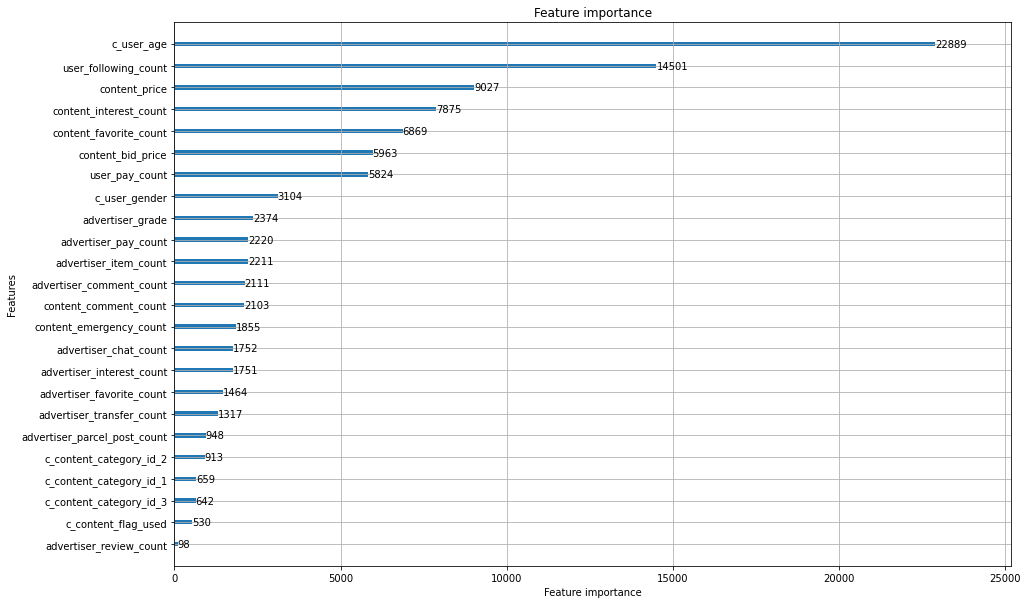

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
lgb.plot_importance(model, ax=ax)

### Dump the model

In [14]:
joblib.dump(model, 'temp/model.pkl')

['temp/model.pkl']